# Final Project
## LSTM: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [6]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [7]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [8]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

### Graph of station 1

[Text(0.5, 0, 'timestamp'), Text(0, 0.5, 'In')]

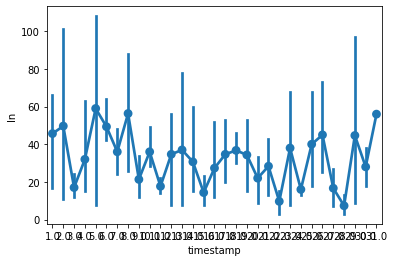

In [9]:
ax = sns.pointplot(x = 'date', y = "In", data = df[1]);
ax.set(xlabel = 'timestamp', ylabel = 'In')

## Comparison

In [10]:
# determine which error is to be used to compare it with, 
# make an array with that error calculated, 
# work out mean , ... , to determine which method is more appropreiate.

## LSTM (Long short-term memory neural networks)

In [11]:
# look for 'time_stemps' of history values
def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

### RobustScalar

In [12]:
# split into train and test sets

# fix random seed for reproducibility
import numpy
numpy.random.seed(7)

train_size = int(len(df[1]) * 0.8)
test_size = len(df[1]) - train_size

train, test = df[1].iloc[0:train_size], df[1].iloc[train_size:len(df)]

from sklearn.preprocessing import RobustScaler
f_transformer = RobustScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

total_transformer = RobustScaler()
total_transformer = total_transformer.fit(train[['In']])
train['In'] = total_transformer.transform(train[['In']])
test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
test['In'] = total_transformer.transform(test[['In']])

time_steps = 3
X_train, y_train = createDataset(train, train['In'], time_steps)
X_test, y_test = createDataset(test, test['In'], time_steps)

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/1323191245.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2022-04-04 13:11:32.949954: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
2/2 [==============================] - 4s 628ms/step - loss: 0.5516 - val_loss: 0.5441
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 0.4714 - val_loss: 0.5704
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.3980 - val_loss: 0.6183
Epoch 4/20
2/2 [==============================] - 0s 25ms/step - loss: 0.4308 - val_loss: 0.6336
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 0.3002 - val_loss: 0.6755
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 0.3785 - val_loss: 0.7179
Epoch 7/20
2/2 [==============================] - 0s 29ms/step - loss: 0.3338 - val_loss: 0.7366
Epoch 8/20
2/2 [==============================] - 0s 30ms/step - loss: 0.3434 - val_loss: 0.6954
Epoch 9/20
2/2 [==============================] - 0s 29ms/step - loss: 0.2705 - val_loss: 0.6607
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 0.2804 - val_loss: 0.6844
Epoch 11/20
2/2 [===========

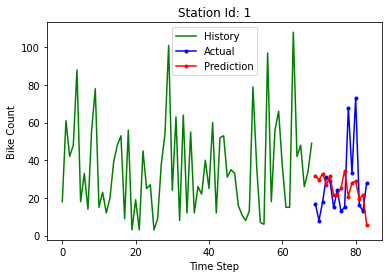

MAE: 15.271634165445963
MSE: 420.3888841163726
RMSE: 0.546756994844581
RMAE: 0.6381563933297345


In [13]:
LSTM_model = keras.Sequential()
LSTM_model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
LSTM_model.add(layers.Dropout(rate = 0.2))
LSTM_model.add(layers.Dense(units = 1))

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

history = LSTM_model.fit(
    X_train, y_train, 
    epochs = 20, 
    batch_size = 32, 
    validation_split = 0.1,
    shuffle = False
)

y_pred = LSTM_model.predict(X_test)

y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()

## Print heading
plt.title( 'Station Id: %d' % (1))

plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Calculate error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_inv, y_pred_inv))
print('MSE:', metrics.mean_squared_error(y_test_inv, y_pred_inv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

### MinMaxScalar

In [14]:
# split into train and test sets

# fix random seed for reproducibility
import numpy
numpy.random.seed(7)

train_size = int(len(df[1]) * 0.8)
test_size = len(df[1]) - train_size

train, test = df[1].iloc[0:train_size], df[1].iloc[train_size:len(df)]

from sklearn.preprocessing import MinMaxScaler
f_transformer = MinMaxScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

total_transformer = MinMaxScaler()
total_transformer = total_transformer.fit(train[['In']])
train['In'] = total_transformer.transform(train[['In']])
test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
test['In'] = total_transformer.transform(test[['In']])

time_steps = 3
X_train, y_train = createDataset(train, train['In'], time_steps)
X_test, y_test = createDataset(test, test['In'], time_steps)

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/1590231652.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

In [15]:
LSTM_model = keras.Sequential()
LSTM_model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
LSTM_model.add(layers.Dropout(rate = 0.2))
LSTM_model.add(layers.Dense(units = 1))

LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

history = LSTM_model.fit(
    X_train, y_train, 
    epochs = 20, 
    batch_size = 32, 
    validation_split = 0.1,
    shuffle = False
)

Epoch 1/20
2/2 [==============================] - 4s 636ms/step - loss: 0.2508 - val_loss: 0.0625
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 0.2358 - val_loss: 0.1020
Epoch 3/20
2/2 [==============================] - 0s 33ms/step - loss: 0.1325 - val_loss: 0.1987
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1664 - val_loss: 0.1580
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1385 - val_loss: 0.0897
Epoch 6/20
2/2 [==============================] - 0s 30ms/step - loss: 0.1293 - val_loss: 0.0768
Epoch 7/20
2/2 [==============================] - 0s 32ms/step - loss: 0.1564 - val_loss: 0.0821
Epoch 8/20
2/2 [==============================] - 0s 34ms/step - loss: 0.1177 - val_loss: 0.0909
Epoch 9/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1058 - val_loss: 0.1175
Epoch 10/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1008 - val_loss: 0.1343
Epoch 11/20
2/2 [===========

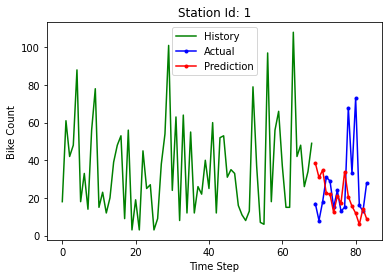

MAE: 17.47028490702311
MSE: 568.376224095055
RMSE: 23.840642275221008
RMAE: 4.179746990790604


In [16]:
y_pred = LSTM_model.predict(X_test)

y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


## Print heading
plt.title( 'Station Id: %d' % (1))
plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Calculate error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_inv, y_pred_inv))
print('MSE:', metrics.mean_squared_error(y_test_inv, y_pred_inv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_inv, y_pred_inv)))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test_inv, y_pred_inv)))
    

# To observe full station 

Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 693ms/step - loss: 1.1719 - val_loss: 1.4931
Epoch 2/20
2/2 [==============================] - 0s 31ms/step - loss: 0.7516 - val_loss: 0.8509
Epoch 3/20
2/2 [==============================] - 0s 30ms/step - loss: 0.6587 - val_loss: 0.6713
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.5440 - val_loss: 0.6175
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 0.5565 - val_loss: 0.6468
Epoch 6/20
2/2 [==============================] - 0s 31ms/step - loss: 0.3457 - val_loss: 0.7229
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.4142 - val_loss: 0.7462
Epoch 8/20
2/2 [==============================] - 0s 34ms/step - loss: 0.3520 - val_loss: 0.6994
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.3903 - val_loss: 0.6299
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 0.3575 - val_loss: 0.5888
Epoch 11/20
2/2 [======================

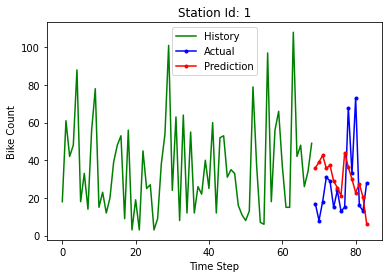

MAE: 17.703527450561523
MSE: 486.96826909040124
RMSE: 22.067357546620784
RMAE: 4.207555994940712
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 739ms/step - loss: 1.5552 - val_loss: 4.2370
Epoch 2/20
2/2 [==============================] - 0s 33ms/step - loss: 1.2665 - val_loss: 3.6152
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.8578 - val_loss: 3.4923
Epoch 4/20
2/2 [==============================] - 0s 29ms/step - loss: 0.9836 - val_loss: 3.5324
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.9973 - val_loss: 3.5543
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 0.8752 - val_loss: 3.5053
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.6735 - val_loss: 3.3984
Epoch 8/20
2/2 [==============================] - 0s 36ms/step - loss: 0.6218 - val_loss: 3.3978
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.6660 - val_loss: 3.5423
Epoch 10/20
2/2 [==============================] - 0s 33ms/step - loss: 0.7260 - val_loss: 3.7455
Epoch 11/20
2/2 [======================

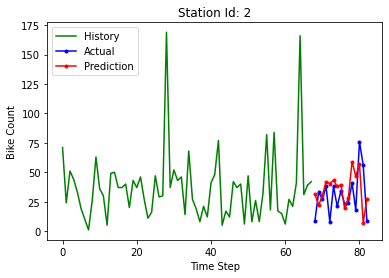

MAE: 16.19096997578939
MSE: 423.8139870985753
RMSE: 20.586742993940913
RMAE: 4.02380043935946
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 823ms/step - loss: 1.2268 - val_loss: 5.7476
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8268 - val_loss: 5.1286
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.9408 - val_loss: 5.1521
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.8648 - val_loss: 5.4746
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.6678 - val_loss: 5.9556
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.5815 - val_loss: 6.4742
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.6391 - val_loss: 6.8037
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.5543 - val_loss: 6.8655
Epoch 9/20
2/2 [==============================] - 0s 35ms/step - loss: 0.5220 - val_loss: 6.7497
Epoch 10/20
2/2 [==============================] - 0s 35ms/step - loss: 0.5640 - val_loss: 6.5957
Epoch 11/20
2/2 [======================

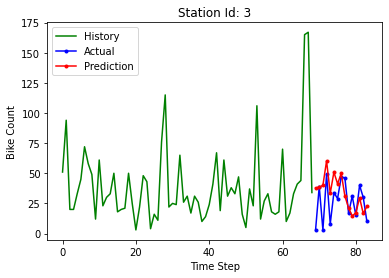

MAE: 14.33463249206543
MSE: 316.4328315825296
RMSE: 17.78855900804024
RMAE: 3.7861104701349415
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 698ms/step - loss: 0.9054 - val_loss: 6.2222
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 0.7098 - val_loss: 6.8490
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7847 - val_loss: 6.6814
Epoch 4/20
2/2 [==============================] - 0s 26ms/step - loss: 0.6196 - val_loss: 6.3541
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 0.7142 - val_loss: 6.3769
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 0.6195 - val_loss: 6.5701
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.4988 - val_loss: 6.8623
Epoch 8/20
2/2 [==============================] - 0s 31ms/step - loss: 0.4877 - val_loss: 6.9701
Epoch 9/20
2/2 [==============================] - 0s 32ms/step - loss: 0.5261 - val_loss: 7.2191
Epoch 10/20
2/2 [==============================] - 0s 33ms/step - loss: 0.5177 - val_loss: 7.2974
Epoch 11/20
2/2 [======================

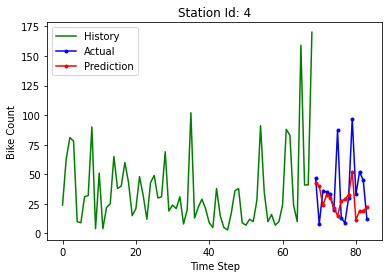

MAE: 20.005497042338053
MSE: 757.700270590068
RMSE: 27.526355926458336
RMAE: 4.472750500792332
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 951ms/step - loss: 0.9773 - val_loss: 0.3235
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 0.7139 - val_loss: 0.3765
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 0.5740 - val_loss: 0.4208
Epoch 4/20
2/2 [==============================] - 0s 25ms/step - loss: 0.5014 - val_loss: 0.4584
Epoch 5/20
2/2 [==============================] - 0s 27ms/step - loss: 0.5313 - val_loss: 0.5152
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5250 - val_loss: 0.5328
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.4628 - val_loss: 0.5087
Epoch 8/20
2/2 [==============================] - 0s 29ms/step - loss: 0.4239 - val_loss: 0.4823
Epoch 9/20
2/2 [==============================] - 0s 30ms/step - loss: 0.3722 - val_loss: 0.4634
Epoch 10/20
2/2 [==============================] - 0s 28ms/step - loss: 0.4640 - val_loss: 0.4491
Epoch 11/20
2/2 [======================

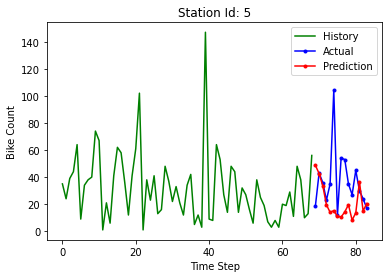

MAE: 20.885986836751304
MSE: 953.4627552476423
RMSE: 30.878192227648988
RMAE: 4.570118908382068
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 656ms/step - loss: 3.6713 - val_loss: 1.6858
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 3.4152 - val_loss: 1.7955
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 3.3310 - val_loss: 1.9071
Epoch 4/20
2/2 [==============================] - 0s 25ms/step - loss: 3.1869 - val_loss: 2.0129
Epoch 5/20
2/2 [==============================] - 0s 27ms/step - loss: 3.1045 - val_loss: 2.1101
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 2.7797 - val_loss: 2.1889
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 2.9227 - val_loss: 2.2776
Epoch 8/20
2/2 [==============================] - 0s 28ms/step - loss: 2.8723 - val_loss: 2.3507
Epoch 9/20
2/2 [==============================] - 0s 27ms/step - loss: 2.9270 - val_loss: 2.3953
Epoch 10/20
2/2 [==============================] - 0s 26ms/step - loss: 2.9799 - val_loss: 2.4127
Epoch 11/20
2/2 [======================

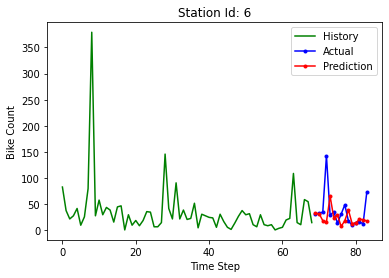

MAE: 23.72055466969808
MSE: 1537.1775740087312
RMSE: 39.206856211748615
RMAE: 4.87037520830768
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 636ms/step - loss: 1.8771 - val_loss: 0.6467
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 1.6526 - val_loss: 0.6775
Epoch 3/20
2/2 [==============================] - 0s 24ms/step - loss: 1.5945 - val_loss: 0.7318
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 1.5117 - val_loss: 0.7917
Epoch 5/20
2/2 [==============================] - 0s 31ms/step - loss: 1.4862 - val_loss: 0.8346
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 1.3503 - val_loss: 0.8265
Epoch 7/20
2/2 [==============================] - 0s 28ms/step - loss: 1.3560 - val_loss: 0.7654
Epoch 8/20
2/2 [==============================] - 0s 31ms/step - loss: 1.4077 - val_loss: 0.6896
Epoch 9/20
2/2 [==============================] - 0s 33ms/step - loss: 1.3764 - val_loss: 0.6304
Epoch 10/20
2/2 [==============================] - 0s 30ms/step - loss: 1.2594 - val_loss: 0.5989
Epoch 11/20
2/2 [======================

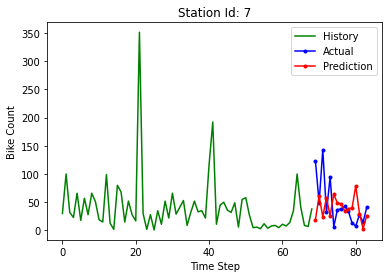

MAE: 36.50784289042155
MSE: 2679.2829192975314
RMSE: 51.761790147728966
RMAE: 6.042172034163008
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 4s 968ms/step - loss: 3.4932 - val_loss: 1.1589
Epoch 2/20
2/2 [==============================] - 0s 27ms/step - loss: 2.7272 - val_loss: 0.8253
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 2.5285 - val_loss: 0.5951
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 2.3875 - val_loss: 0.5002
Epoch 5/20
2/2 [==============================] - 0s 27ms/step - loss: 2.3116 - val_loss: 0.4989
Epoch 6/20
2/2 [==============================] - 0s 27ms/step - loss: 2.3125 - val_loss: 0.5900
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 2.3116 - val_loss: 0.7429
Epoch 8/20
2/2 [==============================] - 0s 30ms/step - loss: 2.5532 - val_loss: 0.8506
Epoch 9/20
2/2 [==============================] - 0s 29ms/step - loss: 2.1296 - val_loss: 0.8592
Epoch 10/20
2/2 [==============================] - 0s 31ms/step - loss: 2.0264 - val_loss: 0.8481
Epoch 11/20
2/2 [======================

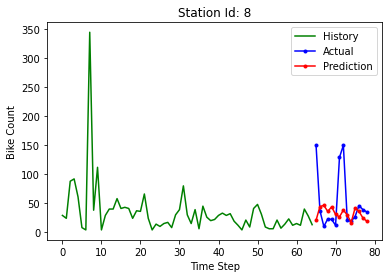

MAE: 36.1976637159075
MSE: 3068.922613776002
RMSE: 55.397857483624776
RMAE: 6.016449427686358
Epoch 1/20


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_881/2664643370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['In'] = total_transformer.transform(train[['In']])
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value 

2/2 [==============================] - 3s 632ms/step - loss: 1.7494 - val_loss: 2.6928
Epoch 2/20
2/2 [==============================] - 0s 30ms/step - loss: 1.4876 - val_loss: 2.4901
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 1.3128 - val_loss: 2.4733
Epoch 4/20
2/2 [==============================] - 0s 25ms/step - loss: 1.3145 - val_loss: 2.4648
Epoch 5/20
2/2 [==============================] - 0s 25ms/step - loss: 1.2010 - val_loss: 2.4150
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 1.2108 - val_loss: 2.3027
Epoch 7/20
2/2 [==============================] - 0s 27ms/step - loss: 1.2677 - val_loss: 2.2115
Epoch 8/20
2/2 [==============================] - 0s 29ms/step - loss: 1.1352 - val_loss: 2.1805
Epoch 9/20
2/2 [==============================] - 0s 30ms/step - loss: 1.1419 - val_loss: 2.1743
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 1.0115 - val_loss: 2.1308
Epoch 11/20
2/2 [======================

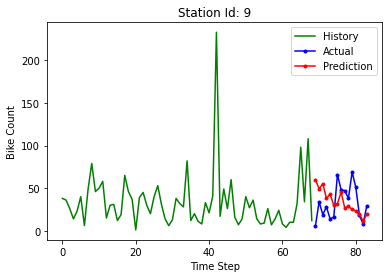

MAE: 20.727985890706382
MSE: 671.0778662698493
RMSE: 25.90517064737944
RMAE: 4.552799785923645

Error Calculation
Average MAE: 20.627466096423923
Average MSE: 1089.483908696133
Average RMSE: 29.111888219319106
Average RMAE: 4.254213276969021


In [17]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    # split into train and test sets
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size

    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]

    from sklearn.preprocessing import RobustScaler
    f_transformer = RobustScaler()
    feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
    f_transformer = f_transformer.fit(train[feature_columns].to_numpy())
    train.loc[:, feature_columns] = f_transformer.transform(train[feature_columns].to_numpy())

    total_transformer = RobustScaler()
    total_transformer = total_transformer.fit(train[['In']])
    train['In'] = total_transformer.transform(train[['In']])
    test.loc[:, feature_columns] = f_transformer.transform(test[feature_columns].to_numpy())
    test['In'] = total_transformer.transform(test[['In']])

    time_steps = 3
    X_train, y_train = createDataset(train, train['In'], time_steps)
    X_test, y_test = createDataset(test, test['In'], time_steps)
    
    from tensorflow.keras import layers

    LSTM_model = keras.Sequential()
    LSTM_model.add(
      layers.Bidirectional(
        layers.LSTM(
          units = 128, 
          input_shape = (X_train.shape[1], X_train.shape[2])
        )
      )
    )
    LSTM_model.add(layers.Dropout(rate = 0.2))
    LSTM_model.add(layers.Dense(units = 1))

    LSTM_model.compile(loss='mean_squared_error', optimizer='adam')

    history = LSTM_model.fit(
        X_train, y_train, 
        epochs = 20, 
        batch_size = 32, 
        validation_split = 0.1,
        shuffle = False
    )
    
    y_pred = LSTM_model.predict(X_test)
    y_train_inv = total_transformer.inverse_transform(y_train.reshape(1, -1)).flatten()
    y_test_inv = total_transformer.inverse_transform(y_test.reshape(1, -1)).flatten()
    y_pred_inv = total_transformer.inverse_transform(y_pred).flatten()


    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();
    
    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test_inv, y_pred_inv)
    MSE = metrics.mean_squared_error(y_test_inv, y_pred_inv)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_inv, y_pred_inv))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_inv, y_pred_inv))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

- https://medium.com/@nutanbhogendrasharma/tensorflow-demand-prediction-with-london-bike-sharing-dataset-3436ac12f230